In [135]:
using CUDA
using Plots
include("Operations.jl")

kernel_step_1! (generic function with 1 method)

In [136]:
CUDA.allowscalar(false)

In [137]:
const nx = 41
const dx = 2 / (nx-1)
const nt = 25
const dt = 0.025
const c = 1

1

In [138]:
u = CuArray{Float64}(undef , nx);
u = CUDA.ones(nx)

41-element CuArray{Float32, 1, CUDA.Mem.DeviceBuffer}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [139]:
CUDA.allowscalar() do

    for i in range(Int(round(nx/3)), stop=Int(round(2*nx/3)))

        u[i] = 2;

    end

end

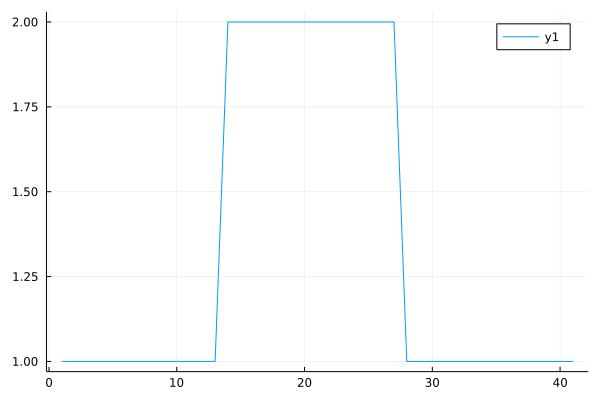

In [140]:
up = Array(u) 

pb = plot(up)

In [141]:
u_old = CuArray{Float64}(undef, nx)
u_old = copy(u)

#for i in range(1, stop=nt)
@cuda threads=10 kernel_step_1!(u, u_old, c, dt, dx)
synchronize()
#end

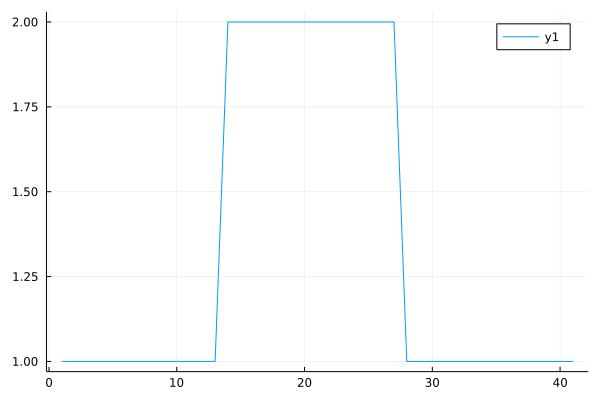

thread: 1
thread: 2
thread: 3
thread: 4
thread: 5
thread: 6
thread: 7
thread: 8
thread: 9
thread: 10


In [142]:
up = Array(u)

pa = plot(up)

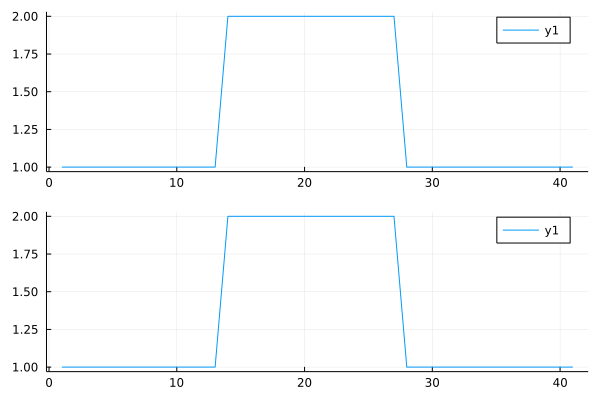

In [143]:
plot(pb, pa, layout=(2,1))